In [130]:
# importamos las libreiras necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
# Leer los datos desde archivos CSV
df1 = pd.read_csv(r'datasets\datos_original\HECHOS.csv')
df2 = pd.read_csv(r'datasets\datos_original\VICTIMAS.csv')

# Crear copias de los DataFrames originales para manipular
df_hechos = df1.copy()
df_victimas = df2.copy()

#### Comenzaremos realizando las siguietes trasformaciones
- Homologar la columna que refiere al identificador de los hechos a id_hecho en ambos dataframes.

- Eliminar columnas "AAAA", "MM", "DD" en df_hechos por su redundancia.	

- Eliminar columnas "AAAA", "MM", "DD", "XY (CABA)", "PARTICIPANTES", "FECHA_DE_FALLECIOMIENTO" y "HH" en df_victimas por su redundancia.	



In [132]:
# Homologar las columnas a 'id_hecho' en ambos dataframes.
df_hechos.rename(columns={'ID': 'id_hecho'}, inplace=True)
df_victimas.rename(columns={'ID_hecho': 'id_hecho'}, inplace=True)

# Eliminar las columnas redundates
df_hechos.drop(["AAAA", "MM", "DD", "XY (CABA)", "PARTICIPANTES", "HORA"], axis=1, inplace=True)
df_victimas.drop(["AAAA", "MM", "DD",'FECHA_FALLECIMIENTO'], axis=1, inplace=True)

- La columna "Direccion Normalizada" de df_hechos parece ser la que mas informacion nos aporta respecto a la direccion del hecho, sin embargo existen valores faltantes que por alguna razon si se encuentran en la columna "LUGAR_DEL_HECHO". Por lo tanto, realizaremos este remplazo de valores faltantes y luego eliminaremos las columnas redundates: "LUGAR_DEL_HECHO", "Calle", "Altura" y "Cruce".



In [133]:
# Rellenar los valores faltantes en 'Dirección Normalizada' con los valores de 'LUGAR_DEL_HECHO'.
df_hechos['Dirección Normalizada'].fillna(df_hechos['LUGAR_DEL_HECHO'], inplace=True)

# Eliminar las columnas redundates
df_hechos.drop(["LUGAR_DEL_HECHO", "Calle", "Altura", "Cruce"], axis=1, inplace=True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_5044\1046297174.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hechos['Dirección Normalizada'].fillna(df_hechos['LUGAR_DEL_HECHO'], inplace=True)


## Manejo de Datos Nulos

> Al utilizar el metodo isnull() de Pandas este nos indica que no hay valores faltantes, sin embargo el diccionario del dataset esepcifica que los valores nulos se denotan como "SD". Buscaremos por tanto dichos valores en el conjunto de datos.


In [134]:
# Lista de columnas en las que deseas contar valores "SD"
columnas_a_verificar = ['N_VICTIMAS', 'FECHA', 'HH', 'TIPO_DE_CALLE', 'COMUNA', 'pos x', 'pos y', 'VICTIMA', 'ACUSADO']

# Conteo de valores "SD" para cada columna
for columna in columnas_a_verificar:
    conteo_sd = (df_hechos[columna] == 'SD').sum()
    print(f"Conteo de 'SD' en la columna {columna}: {conteo_sd}")


Conteo de 'SD' en la columna N_VICTIMAS: 0
Conteo de 'SD' en la columna FECHA: 0
Conteo de 'SD' en la columna HH: 1
Conteo de 'SD' en la columna TIPO_DE_CALLE: 0
Conteo de 'SD' en la columna COMUNA: 0
Conteo de 'SD' en la columna pos x: 0
Conteo de 'SD' en la columna pos y: 0
Conteo de 'SD' en la columna VICTIMA: 9
Conteo de 'SD' en la columna ACUSADO: 23


In [135]:
# Lista de columnas en las que deseas contar valores "SD" para df_victimas
columnas_a_verificar_victimas = [ 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD']

# Conteo de valores "SD" para cada columna en df_victimas
for columna in columnas_a_verificar_victimas:
    conteo_sd_victimas = (df_victimas[columna] == 'SD').sum()
    print(f"Conteo de 'SD' en la columna {columna}: {conteo_sd_victimas}")


Conteo de 'SD' en la columna FECHA: 0
Conteo de 'SD' en la columna ROL: 11
Conteo de 'SD' en la columna VICTIMA: 9
Conteo de 'SD' en la columna SEXO: 6
Conteo de 'SD' en la columna EDAD: 53


>  Ahora debemos establecer un criterio para imputar o tratar de alguna forma estos datos faltantes. Estableceremos dichos criterios uno por uno, de forma secuencial, segun corresponda.


### Imputacion de valores faltantes en df_hechos


> En el caso de la hora solo tenemos un valor faltante. Utilizaremos la moda para remplazarlo

In [136]:
# Reemplazar la columna 'HH' por la columna 'HORA'
df_hechos['HORA'] = df_hechos['HH']

# Eliminar la columna 'HH' si ya no es necesaria
df_hechos.drop(columns=['HH'], inplace=True)

df_hechos['HORA'].value_counts()
df_hechos['HORA'] = df_hechos['HORA'].replace('SD', '21')

> Dada la poca cantidad de faltantes en este campo y la alta representatividad de la moda procederemos a imputar los valroes faltantes por la moda.

In [137]:
df_hechos['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         264
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

In [138]:
df_hechos['VICTIMA'] = df_hechos['VICTIMA'].replace('SD', 'MOTO')

> Por mas que el campo "ACUSADO" tenga una moda representativa, imputar los valores faltaltes por la misma podria sesgar la distribucion de los datos por la gran cantidad de valores faltantes.

In [139]:
df_hechos['ACUSADO'].value_counts() 

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         146
OBJETO FIJO     62
MOTO            57
SD              23
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

> En este caso, lo que haremos sera distriibuir proporcionalmente los valores faltantes segun la reprentacion que tenga cada nivel de la variable en la distribucion.

In [140]:
# Calcular la proporción de cada categoría, excluyendo 'SD'(frecuancias relativas)
proporciones = df_hechos['ACUSADO'].value_counts(normalize=True)

# Número de 'SD' a imputar
cantidad_sd_a_imputar = 23

# Calcula la cantidad a imputar para cada categoría
cantidad_a_imputar_por_categoria = (proporciones * cantidad_sd_a_imputar).round().astype(int)


# Ahora asignamos estas cantidades a los datos
for categoria, cantidad in cantidad_a_imputar_por_categoria.items():
    if categoria != 'SD':
        # Imputa los valores proporcionalmente a cada categoría
        df_hechos.loc[df_hechos['ACUSADO'] == 'SD', 'ACUSADO'] = categoria
        cantidad -= 1



In [141]:
# Vamos a pasar las coordenadas a formato decimal
df_hechos = df_hechos.rename(columns={'pos x': 'longitud', 'pos y': 'latitud'})


In [142]:
# Convertir las columnas a tipo decimal, reemplazando los valores no numéricos con NaN
df_hechos['longitud'] = pd.to_numeric(df_hechos['longitud'], errors='coerce')
df_hechos['latitud'] = pd.to_numeric(df_hechos['latitud'], errors='coerce')



In [143]:
# Convertir la columna FECHA al formato datetime legible para Power BI
df_hechos['FECHA'] = pd.to_datetime(df_hechos['FECHA'], format='%m/%d/%Y')

> Volvemos a obervar los SD para ver si todo fue imputado corretamente.

In [144]:
# Lista de columnas en las que deseas contar valores "SD"
columnas_a_verificar = ['N_VICTIMAS', 'FECHA', 'HORA', 'TIPO_DE_CALLE', 'COMUNA', 'latitud', 'longitud', 'VICTIMA', 'ACUSADO']

# Conteo de valores "SD" para cada columna
for columna in columnas_a_verificar:
    conteo_sd = (df_hechos[columna] == 'SD').sum()
    print(f"Conteo de 'SD' en la columna {columna}: {conteo_sd}")

Conteo de 'SD' en la columna N_VICTIMAS: 0
Conteo de 'SD' en la columna FECHA: 0
Conteo de 'SD' en la columna HORA: 0
Conteo de 'SD' en la columna TIPO_DE_CALLE: 0
Conteo de 'SD' en la columna COMUNA: 0
Conteo de 'SD' en la columna latitud: 0
Conteo de 'SD' en la columna longitud: 0
Conteo de 'SD' en la columna VICTIMA: 0
Conteo de 'SD' en la columna ACUSADO: 0


### Imputacion de valores faltantes en df_victimas

> Podriamos imputar los valores faltantes de las categorias ROL, VICTIMA y SEXO utilizando la moda. Para considerarla una estrategia valida de imputacion deberia existir una moda significatiamente representativa y deberia existir una baja proporcion de valores faltantes sobre el total.

> Si consideramos, en la variable ROL, la proporcion de la moda (CONDUCTOR) en este caso es del 46% aproximadamente (sin computar los SD sobre el total). La elección de "CONDUCTOR" como valor para imputar datos faltantes parece justificada en este caso, considerando la representatividad de esta categoría.

In [145]:
df_victimas['ROL'].value_counts()

ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64

In [146]:

df_victimas['ROL'] = df_victimas['ROL'].replace('SD', 'CONDUCTOR')

> Nuevamente una representatividad del 42% para la moda por parte de MOTO parace ser suficiente para justificar la imputacion.

In [147]:
df_victimas['VICTIMA'].value_counts()

VICTIMA
MOTO         303
PEATON       267
AUTO          94
BICICLETA     29
SD             9
CARGAS         7
PASAJEROS      5
MOVIL          3
Name: count, dtype: int64

In [148]:
df_victimas['VICTIMA'] = df_victimas['VICTIMA'].replace('SD', 'MOTO')

> Al actuar con una variable categorica que unicamente tiene dos niveles deberia uno ser mas cuidadoso con la imputacion a fin de no introducir sesgos importantes, pero en este caso, considernado la enorme diferencia de representatividad de las variables (con un ratio de 3 hombres por cada mujer) y la pequeña cantidad de datos faltantes, imputar los mismos por la moda no deberia representar mayor complicacion.

In [149]:
df_victimas['SEXO'].value_counts()

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64

In [150]:
df_victimas['SEXO'] = df_victimas['SEXO'].replace('SD', 'MASCULINO')

> Observaremos la distribucion de las edades para asi actuar en consecuencia. 

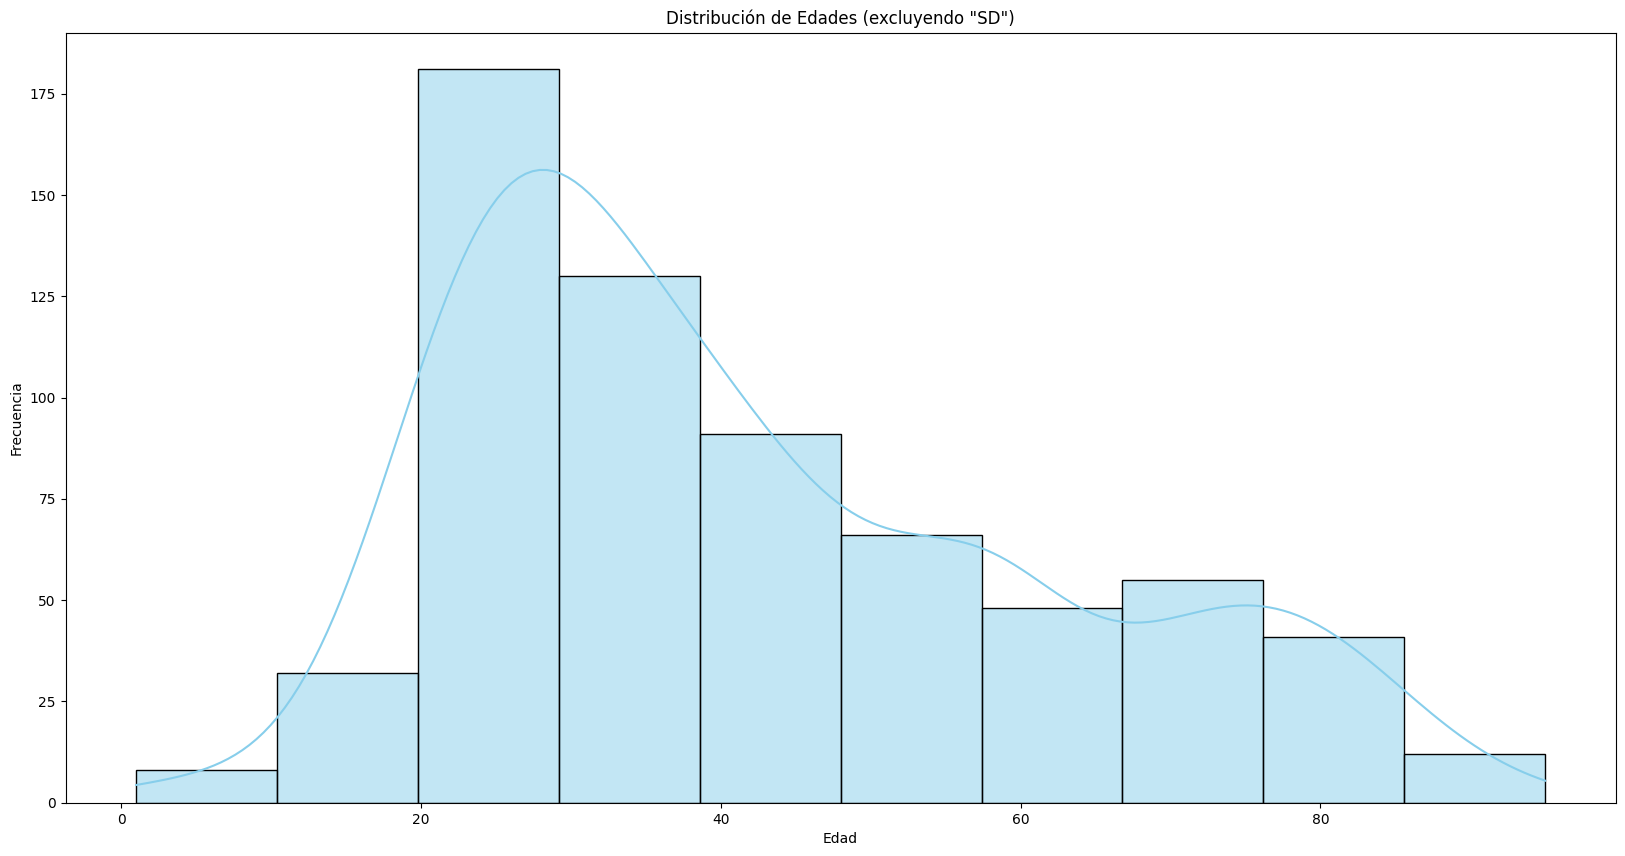

In [151]:
# Filtrar los valores 'SD' antes de crear el histograma
edades_sin_sd = df_victimas[df_victimas['EDAD'] != 'SD']['EDAD']

# Convertir las edades a tipo int y ordenarlas de menor a mayor
edades_sin_sd = edades_sin_sd.astype(int).sort_values()

# Visualización de la distribución con un histograma
plt.figure(figsize=(20, 10))
sns.histplot(edades_sin_sd, bins=10, kde=True, color='skyblue')
plt.title('Distribución de Edades (excluyendo "SD")')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

> Vemos que no estamos ante una distribucion normal, por tanto, para la variable "EDAD" no imputaremos los faltantes utilizando la media, tratando de evitar el efecto de regresion a la media en la distribucion de las edades. 



In [152]:
# Calcular la proporción de cada edad, excluyendo 'SD'(frecuencias relativas)
proporciones_edad = df_victimas['EDAD'].value_counts(normalize=True)

# Número de 'SD' a imputar
cantidad_sd_a_imputar_edad = 53

# Calcular la cantidad a imputar para cada edad
cantidad_a_imputar_por_edad = (proporciones_edad * cantidad_sd_a_imputar_edad).round().astype(int)

# Asignamos estas cantidades a los datos
for edad, cantidad in cantidad_a_imputar_por_edad.items():
    if edad != 'SD':
        # Imputa los valores proporcionalmente a cada edad
        df_victimas.loc[df_victimas['EDAD'] == 'SD', 'EDAD'] = edad
        cantidad -= 1

In [153]:
# Convertir la columna "FECHA" al formato de fecha apropiado
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Obtener el nombre del día de la semana y agregarlo como una nueva columna
df_victimas['DIA_DE_LA_SEMANA'] = df_victimas['FECHA'].dt.day_name()

# Mostrar el DataFrame resultante
df_victimas # Observamos que el resultado esta en ingles


,id_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,DIA_DE_LA_SEMANA
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,Friday
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,Saturday
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,Sunday
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,Sunday
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,Thursday
...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50,Sunday
713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,Monday
714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,Monday
715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,Thursday


In [154]:
# Diccionario para mapear los nombres de los días de la semana en inglés a español
dias_dict = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Mapear los nombres de los días de la semana en inglés a español
df_victimas['DIA_DE_LA_SEMANA'] = df_victimas['DIA_DE_LA_SEMANA'].map(dias_dict)

In [155]:
df_victimas

,id_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,DIA_DE_LA_SEMANA
0,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,Viernes
1,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,Sábado
2,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,Domingo
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,Domingo
4,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29,Jueves
...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,PEATON,PEATON,FEMENINO,50,Domingo
713,2021-0093,2021-12-13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,Lunes
714,2021-0094,2021-12-20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,Lunes
715,2021-0095,2021-12-30,CONDUCTOR,MOTO,MASCULINO,27,Jueves


In [156]:
# Lista de columnas en las que deseas contar valores "SD" para df_victimas
columnas_a_verificar_victimas = [ 'FECHA', 'ROL', 'VICTIMA', 'SEXO', 'EDAD','DIA_DE_LA_SEMANA']

# Conteo de valores "SD" para cada columna en df_victimas
for columna in columnas_a_verificar_victimas:
    conteo_sd_victimas = (df_victimas[columna] == 'SD').sum()
    print(f"Conteo de 'SD' en la columna {columna}: {conteo_sd_victimas}")

Conteo de 'SD' en la columna FECHA: 0
Conteo de 'SD' en la columna ROL: 0
Conteo de 'SD' en la columna VICTIMA: 0
Conteo de 'SD' en la columna SEXO: 0
Conteo de 'SD' en la columna EDAD: 0
Conteo de 'SD' en la columna DIA_DE_LA_SEMANA: 0


In [157]:
# Dropear la columna FECHA de df_victimas 
df_victimas.drop(columns=['FECHA'], inplace=True)
 # Dropear la columna Dirección Normalizada de df_hechos
df_hechos.drop(columns=['Dirección Normalizada'], inplace=True)   
 

> Dado que imputamos todos los valores del conjunto de datos, la diferencia entre el conjunto de datos original y el limpio se encuentra unucamente en la cantidad de columnas, mas las filas se mantienen identicas.

In [158]:
print(f"ORIGINAL VICTIMAS: {df2.shape}")
print(f"LIMPIO VICTIMAS: {df_victimas.shape}\n")

print(F"\nORIGINAL HECHOS: {df1.shape}")
print(F"LIMPIO HECHOS: {df_hechos.shape}")


ORIGINAL VICTIMAS: (717, 10)
LIMPIO VICTIMAS: (717, 6)


ORIGINAL HECHOS: (696, 21)
LIMPIO HECHOS: (696, 10)


> Ahora que los datos estan limpios podemos exportarlos y comenzar a trabajar con ellos para obtener algunos insigths

In [159]:


# Exporta df_hechos a un archivo CSV en la ruta especificada
df_hechos.to_csv('hechos.csv', index=False)

# Exporta df_victimas a un archivo CSV en la ruta especificada
df_victimas.to_csv('victimas.csv', index=False)
